In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")  

### Reading and Basic info of Data

- MonthlyCharges: The monthly fee paid by the customer for services, likely in currency units (e.g., USD).

- TotalCharges: The cumulative amount paid since joining, typically in currency, correlating with tenure and monthly charges.

- Tenure: Duration of service in months; higher tenure often means customer loyalty.

- ServiceUsage1, 2, 3: Metrics representing service usage (e.g., hours, counts, or data consumption); specific units depend on the service type.

In [2]:
data1=pd.read_csv("data.csv")
data2=pd.read_excel("Expanded_Dataset.xlsx")

In [3]:
data=pd.concat([data1,data2])

In [59]:
data=data.reset_index().drop("index",axis=1)

In [67]:
data.to_csv("./data/final_data.csv",index=False)

In [38]:
data.head()

CustomerID  Gender   Age  Tenure  MonthlyCharges  TotalCharges  \
0   CUST0001    Male  20.0     5.0           62.31       2950.41   
1   CUST0002  Female  25.0    23.0          118.96       7460.55   
2   CUST0003  Female  25.0    39.0           69.20       3064.73   
3   CUST0004    Male  56.0    47.0          145.90       2612.22   
4   CUST0005  Female  33.0    69.0           88.51       4833.99   

   PaymentMethod Churn  ServiceUsage1  ServiceUsage2  ServiceUsage3  
0    Credit Card   Yes           59.0           20.0           63.0  
1  Bank Transfer    No           42.0           41.0          136.0  
2  Bank Transfer    No           65.0            0.0          165.0  
3           Cash    No           64.0           40.0          169.0  
4           Cash    No           62.0            1.0           54.0

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      2200 non-null   object 
 1   Gender          2200 non-null   object 
 2   Age             2200 non-null   float64
 3   Tenure          2200 non-null   float64
 4   MonthlyCharges  2200 non-null   float64
 5   TotalCharges    2200 non-null   float64
 6   PaymentMethod   2200 non-null   object 
 7   Churn           2200 non-null   object 
 8   ServiceUsage1   2200 non-null   float64
 9   ServiceUsage2   2200 non-null   float64
 10  ServiceUsage3   2200 non-null   float64
dtypes: float64(7), object(4)
memory usage: 189.2+ KB


In [65]:
data.duplicated().sum()

np.int64(0)

In [84]:
data.describe()

Age       Tenure  MonthlyCharges  TotalCharges  ServiceUsage1  \
count  2200.000000  2200.000000     2200.000000   2200.000000    2200.000000   
mean     42.425756    36.045452       83.006400   5050.773559      50.482331   
std      15.188477    20.453396       38.023545   2813.386228      28.927956   
min      16.663727     0.929087       18.550519    105.382229       0.000000   
25%      29.000000    20.072132       48.997234   2469.985898      25.308435   
50%      41.718538    37.553164       83.112726   4975.289988      51.844359   
75%      55.050394    53.113950      116.706409   7553.806212      75.078262   
max      77.065402    78.837250      168.835324  11468.663047     110.008098   

       ServiceUsage2  ServiceUsage3  
count    2200.000000    2200.000000  
mean       24.733770     107.115075  
std        14.513575      58.266393  
min         0.000000       1.895510  
25%        12.840379      53.903219  
50%        24.963006     105.703797  
75%        37.082341     159.946584  
max        55.213833     226.003023

In [42]:
len(data["CustomerID"].unique())

200

In [9]:
data["PaymentMethod"].unique()

array(['Credit Card', 'Bank Transfer', 'Cash', 'PayPal'], dtype=object)

In [43]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [44]:
data["Churn"].unique()

array(['Yes', 'No'], dtype=object)

In [49]:
np.where(data["ServiceUsage2"]==0)

(array([   2,    6,   19,   47,   77,  155,  251,  265,  274,  279,  283,
         289,  311,  334,  390,  525,  602,  628,  652,  741,  764,  818,
         830,  867,  869,  907,  946,  950,  951,  956,  957,  960, 1006,
        1066, 1067, 1068, 1074, 1079, 1095, 1152, 1265, 1269, 1283, 1315,
        1364, 1482, 1496, 1579, 1631, 1696, 1705, 1706, 1730, 1770, 1772,
        1795, 1835, 1891, 1893, 1915, 1931, 2018, 2040, 2064, 2153, 2170]),)

## EDA

#### Univariate Analysis

Text(0.5, 1.0, 'Churn distribution')

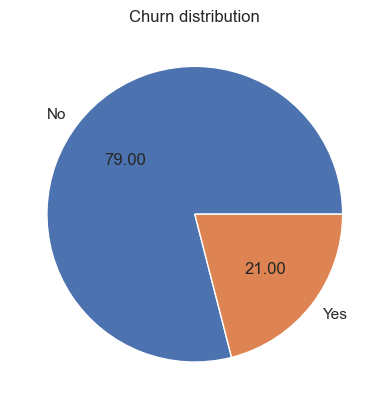

In [10]:
## Churn distribution in data
data.groupby("Churn").size().plot(kind="pie", autopct='%.2f')
plt.title("Churn distribution")

Text(0.5, 1.0, 'Gender Pie chart')

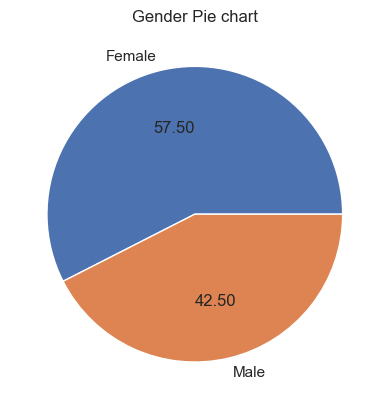

In [11]:
data.groupby("Gender").size().plot(kind="pie",autopct='%.2f')
plt.title("Gender Pie chart")


Text(0.5, 1.0, 'Payment Method Distribution ')

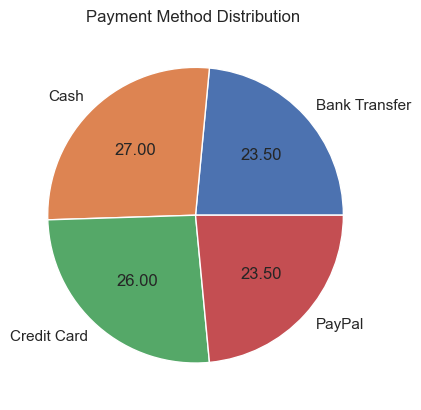

In [12]:
data.groupby("PaymentMethod").size().plot(kind="pie",autopct='%.2f')
plt.title("Payment Method Distribution ")

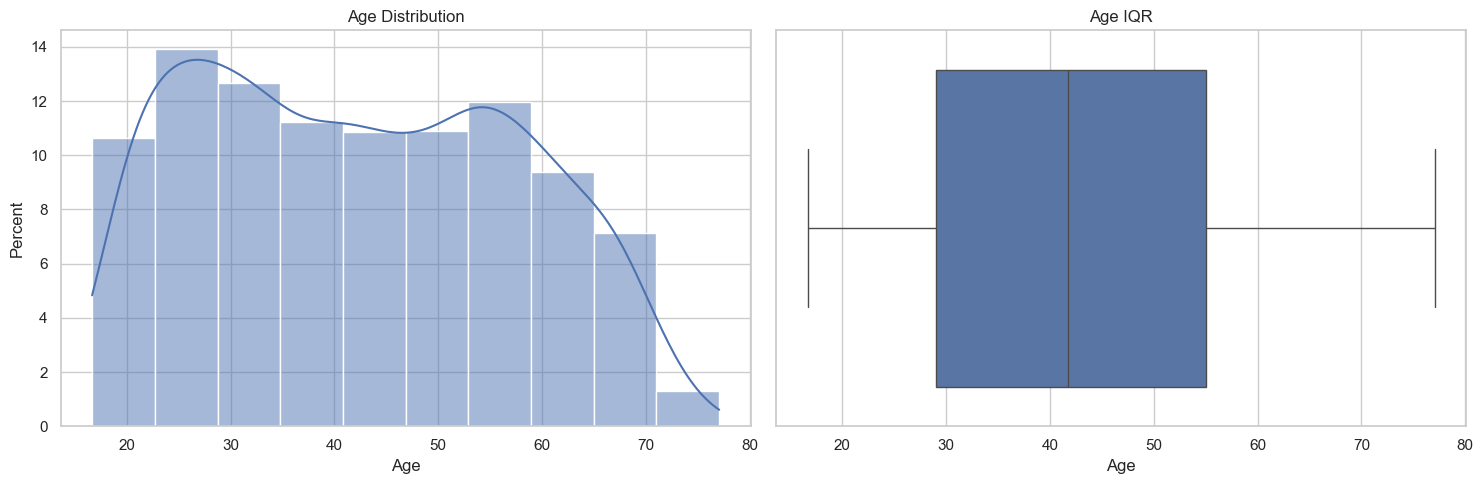

In [51]:
# Age
fig,axs=plt.subplots(1,2,figsize=(15,5))
ax1=axs[0]
ax2=axs[1]
sns.histplot(data=data, x='Age',kde=True,bins=10,stat="percent",ax=ax1)
ax1.set_title("Age Distribution")
ax1.set_xlabel("Age")
sns.boxplot(data=data,x="Age",ax=ax2)
ax2.set_title("Age IQR")
ax2.set_xlabel("Age")
plt.tight_layout()
plt.show()

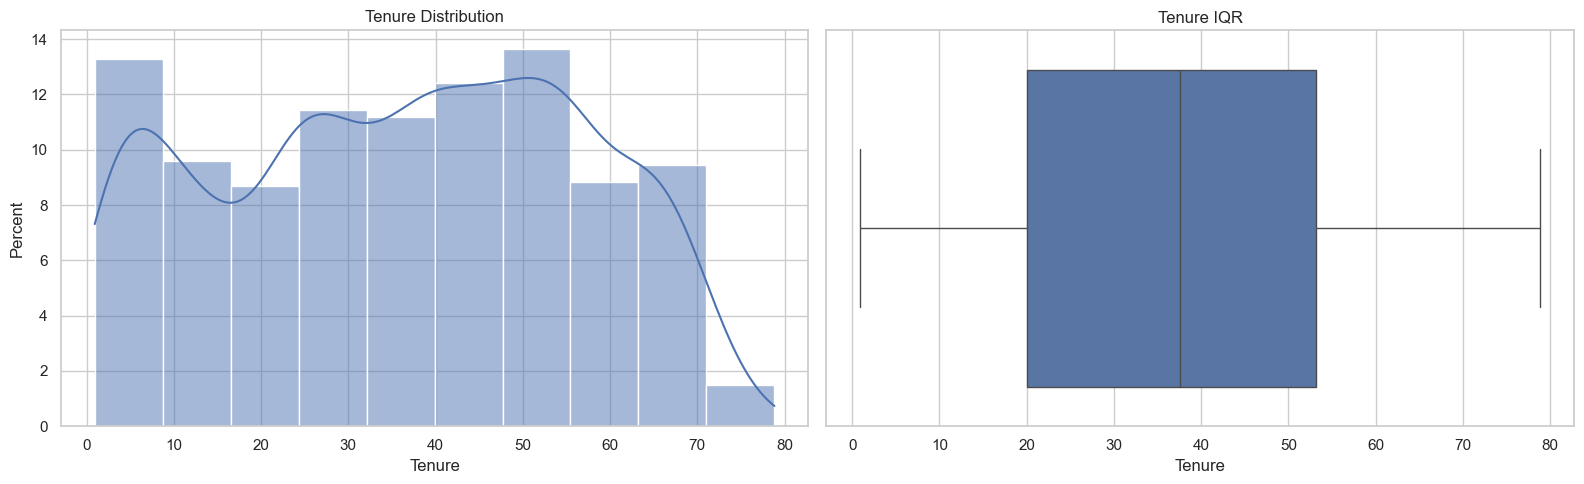

In [14]:
# Tenure
fig,axs=plt.subplots(1,2,figsize=(16,5))
ax1=axs[0]
ax2=axs[1]
sns.histplot(data=data, x='Tenure', kde=True,bins=10,stat="percent",ax=ax1)
ax1.set_title("Tenure Distribution")
ax1.set_xlabel("Tenure")
sns.boxplot(data=data,x="Tenure",ax=ax2)
ax2.set_title("Tenure IQR")
ax2.set_xlabel("Tenure")
plt.tight_layout()
plt.show()


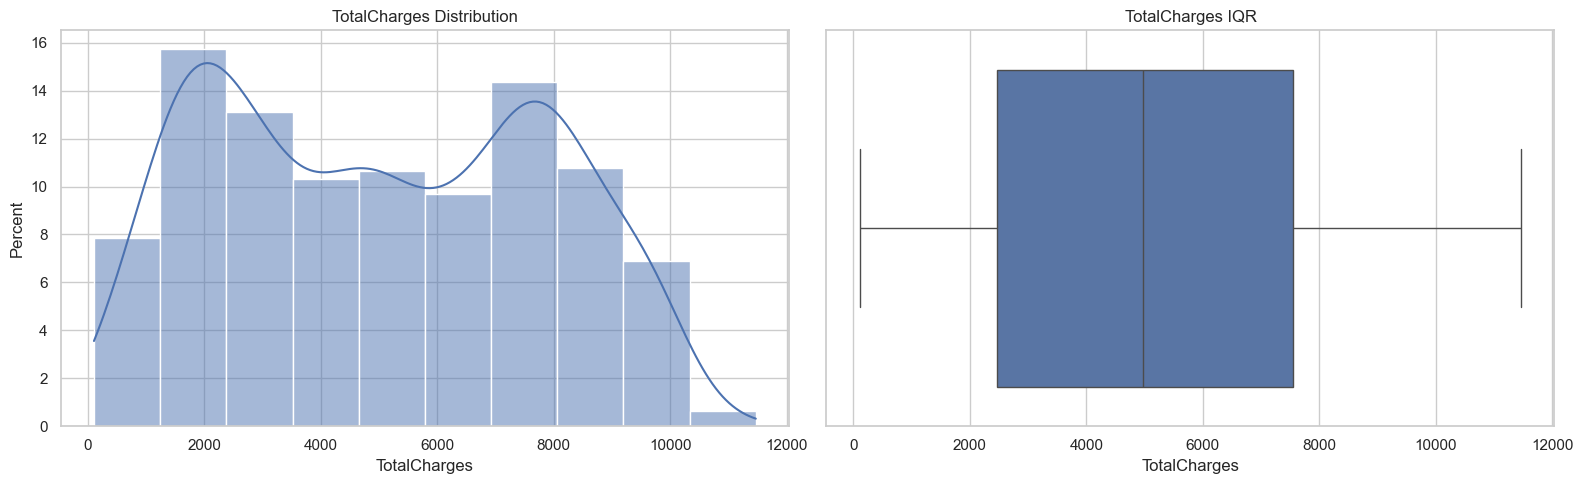

In [53]:
# Tenure
fig,axs=plt.subplots(1,2,figsize=(16,5))
ax1=axs[0]
ax2=axs[1]
sns.histplot(data=data, x='TotalCharges', kde=True,bins=10,stat="percent",ax=ax1)
ax1.set_title("TotalCharges Distribution")
ax1.set_xlabel("TotalCharges")
sns.boxplot(data=data,x="TotalCharges",ax=ax2)
ax2.set_title("TotalCharges IQR")
ax2.set_xlabel("TotalCharges")
plt.tight_layout()
plt.show()

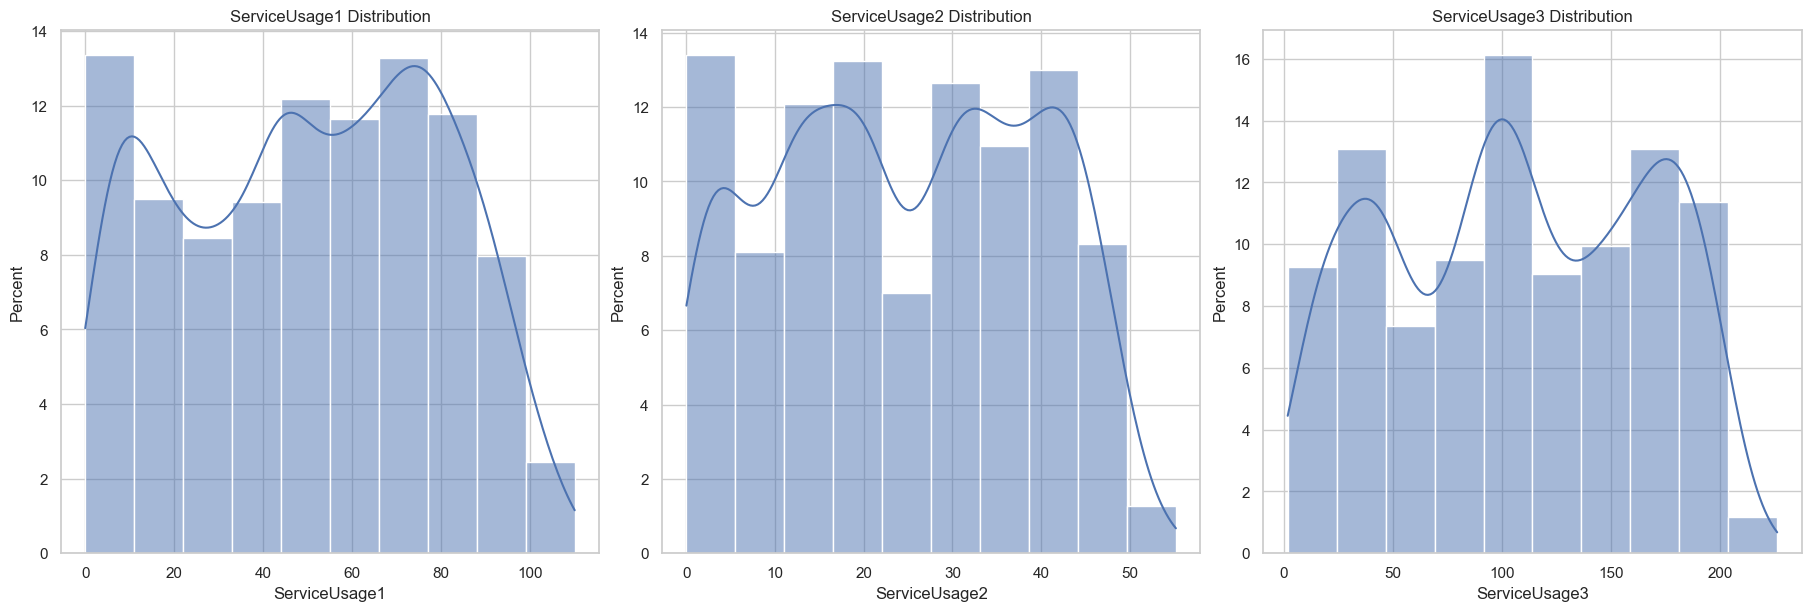

In [16]:
fig,axs=plt.subplots(1,3,figsize=(18,6),constrained_layout=True)
x=["ServiceUsage1","ServiceUsage2","ServiceUsage3"]
for ax,i in zip(axs,x):
    sns.histplot(data=data,x=i,bins=10,kde=True,stat="percent",ax=ax)
    ax.set_title(f"{i} Distribution")

### Bivariate Analysis

#### Numerical versus Numerical Analysis

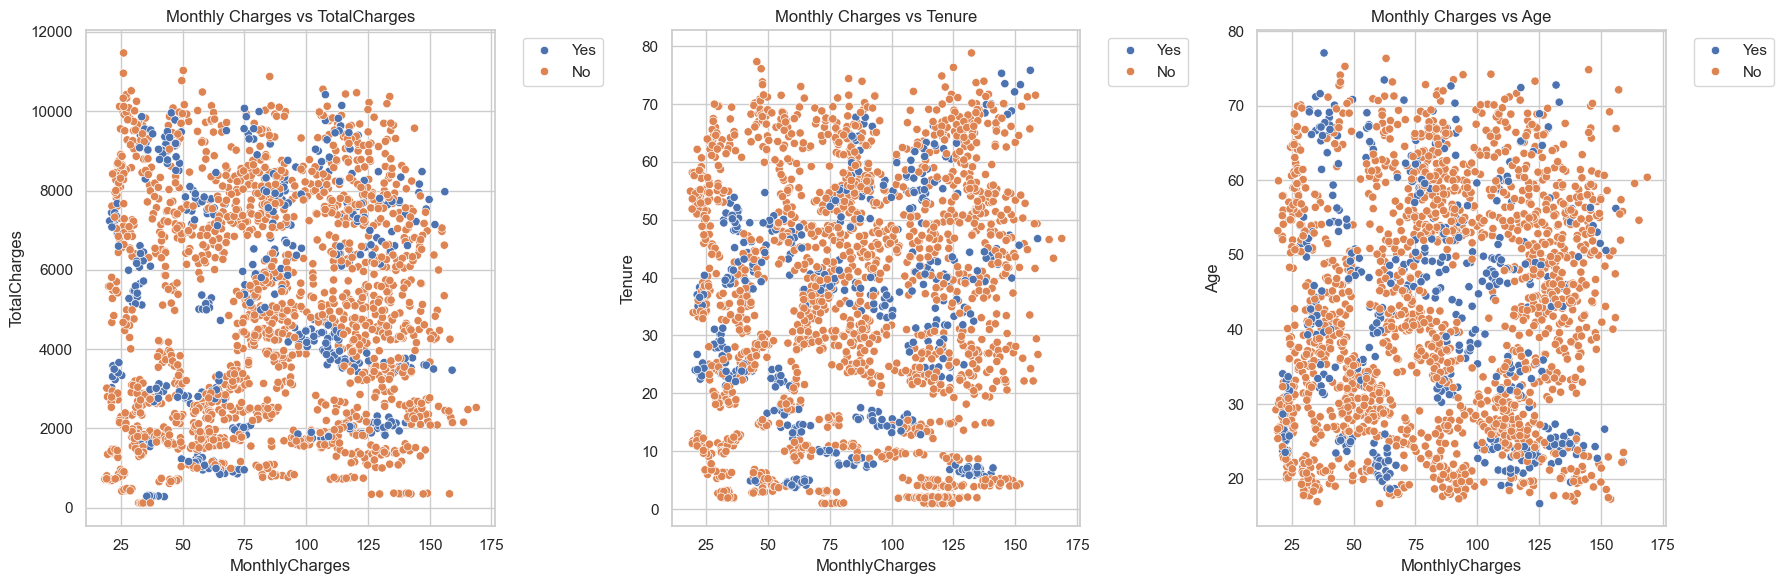

In [17]:
fig,axs=plt.subplots(1,3,figsize=(18,6))
ys=["TotalCharges","Tenure","Age"]
for y,ax in zip(ys,axs):
    
    sns.scatterplot(data=data,x="MonthlyCharges",y=y,ax=ax,hue="Churn")
    ax.set_title(f"Monthly Charges vs {y}")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

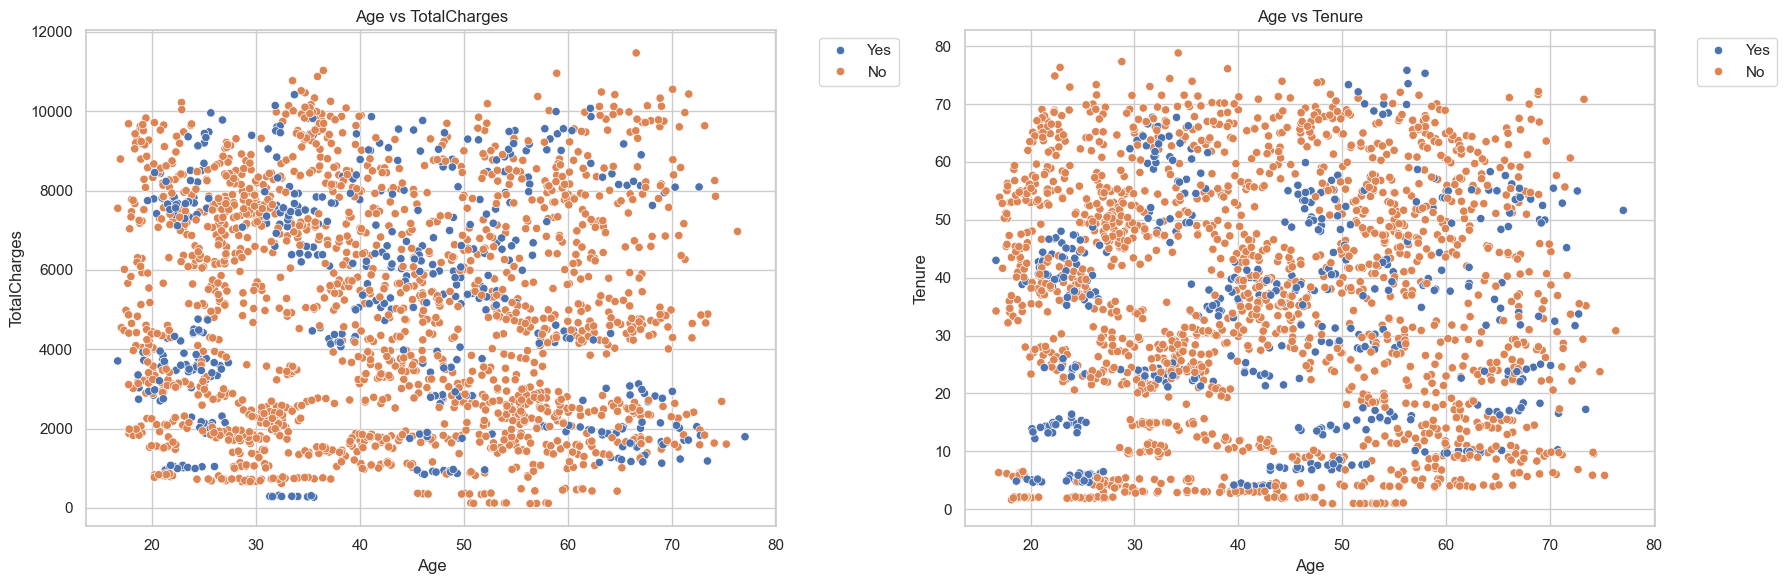

In [18]:
fig,axs=plt.subplots(1,2,figsize=(18,6))
ys=["TotalCharges","Tenure",]
for y,ax in zip(ys,axs):
    
    sns.scatterplot(data=data,x="Age",y=y,ax=ax,hue="Churn")
    ax.set_title(f"Age vs {y}")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


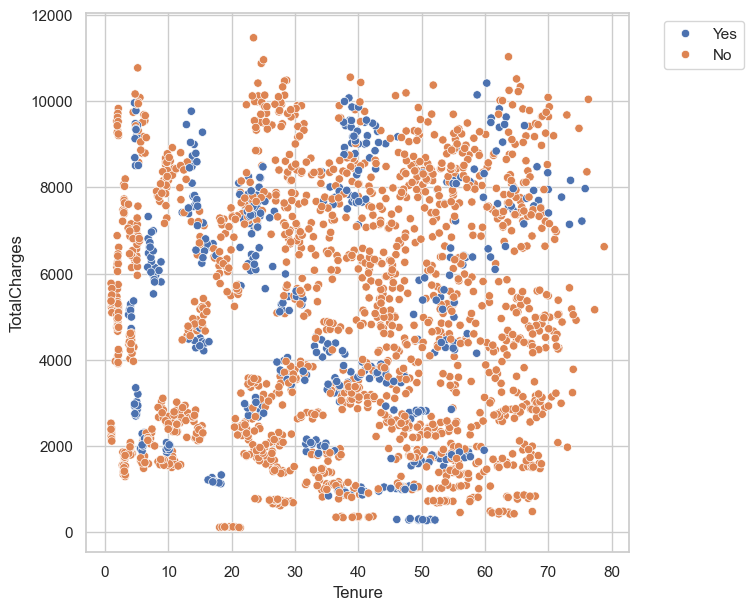

In [19]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=data,x="Tenure",y="TotalCharges",hue="Churn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

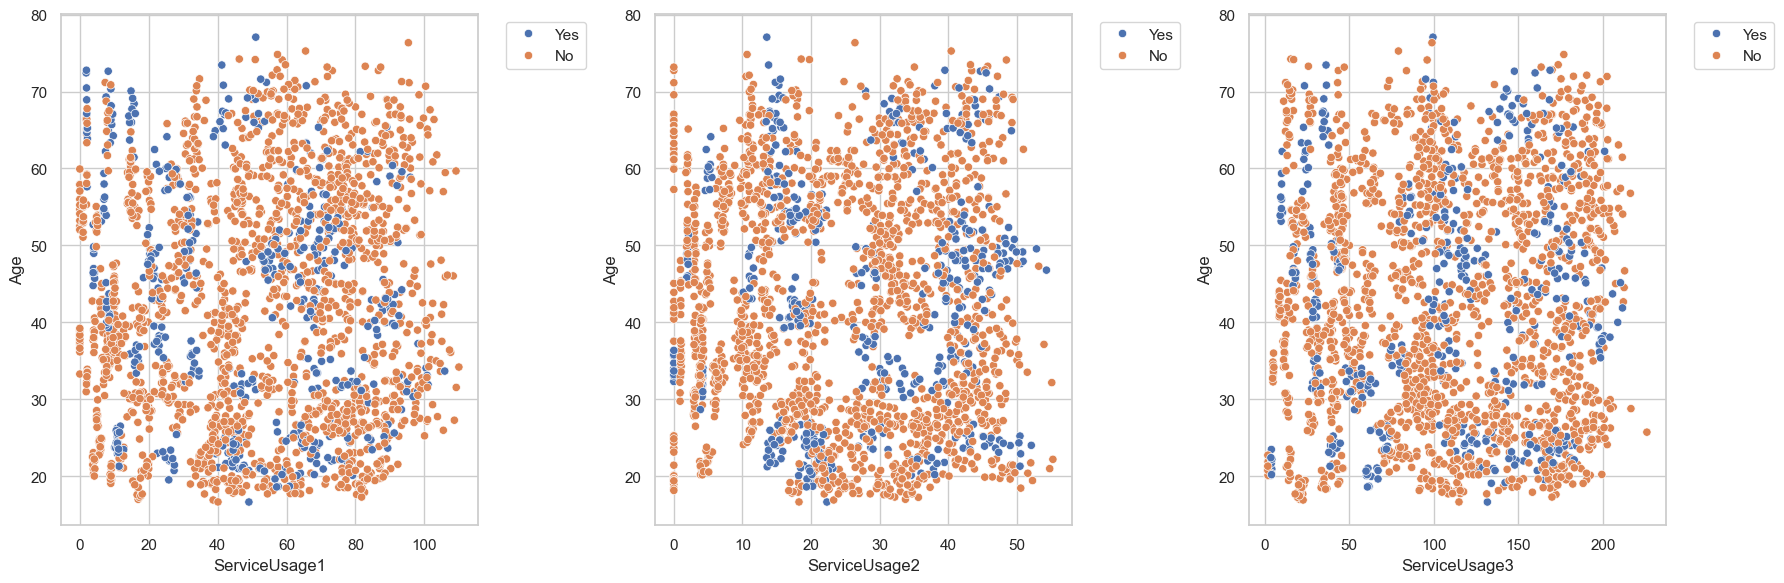

In [20]:

fig,axs=plt.subplots(1,3,figsize=(18,6))
for idx,ax in enumerate(axs):
    sns.scatterplot(data=data,y="Age",x=f"ServiceUsage{idx+1}",hue="Churn",ax=ax)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

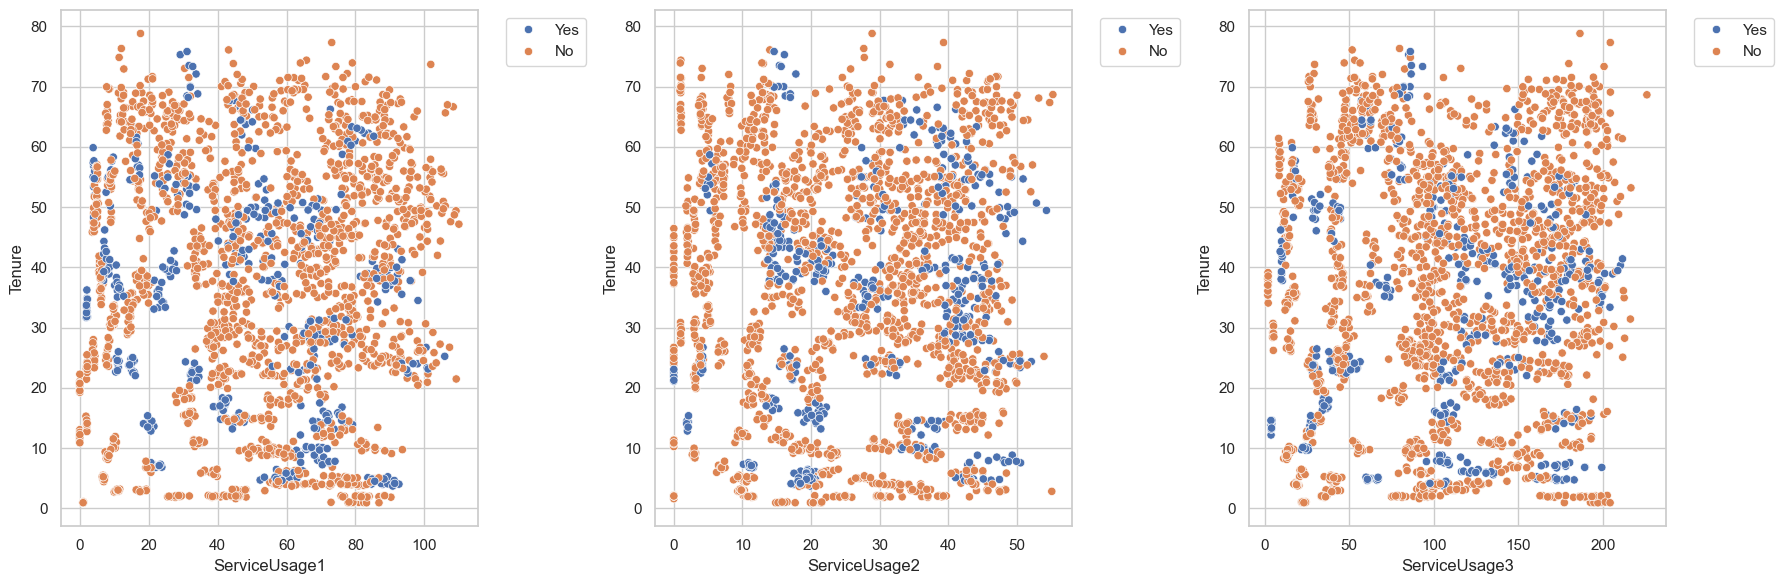

In [21]:
fig,axs=plt.subplots(1,3,figsize=(18,6))
for idx,ax in enumerate(axs):
    sns.scatterplot(data=data,y="Tenure",x=f"ServiceUsage{idx+1}",hue="Churn",ax=ax)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

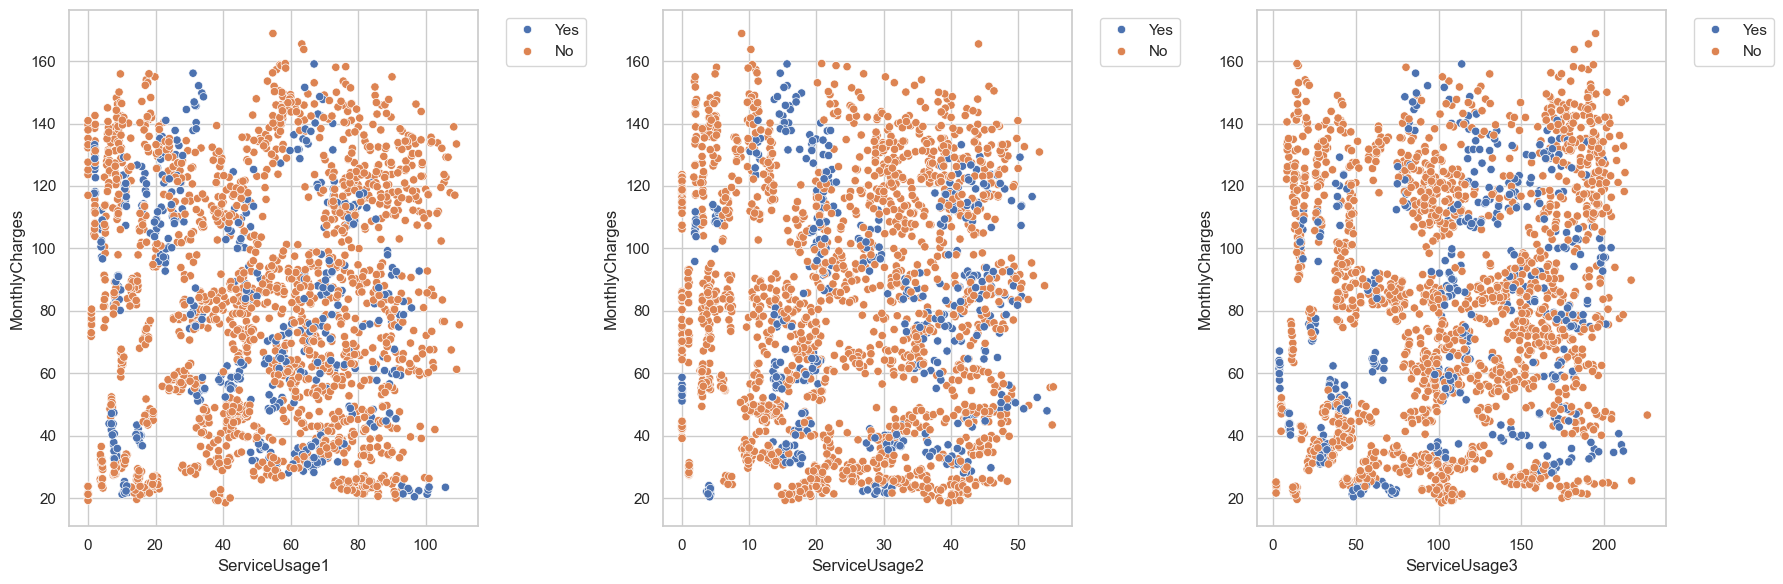

In [22]:
fig,axs=plt.subplots(1,3,figsize=(18,6))
for idx,ax in enumerate(axs):
    sns.scatterplot(data=data,y="MonthlyCharges",x=f"ServiceUsage{idx+1}",hue="Churn",ax=ax)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

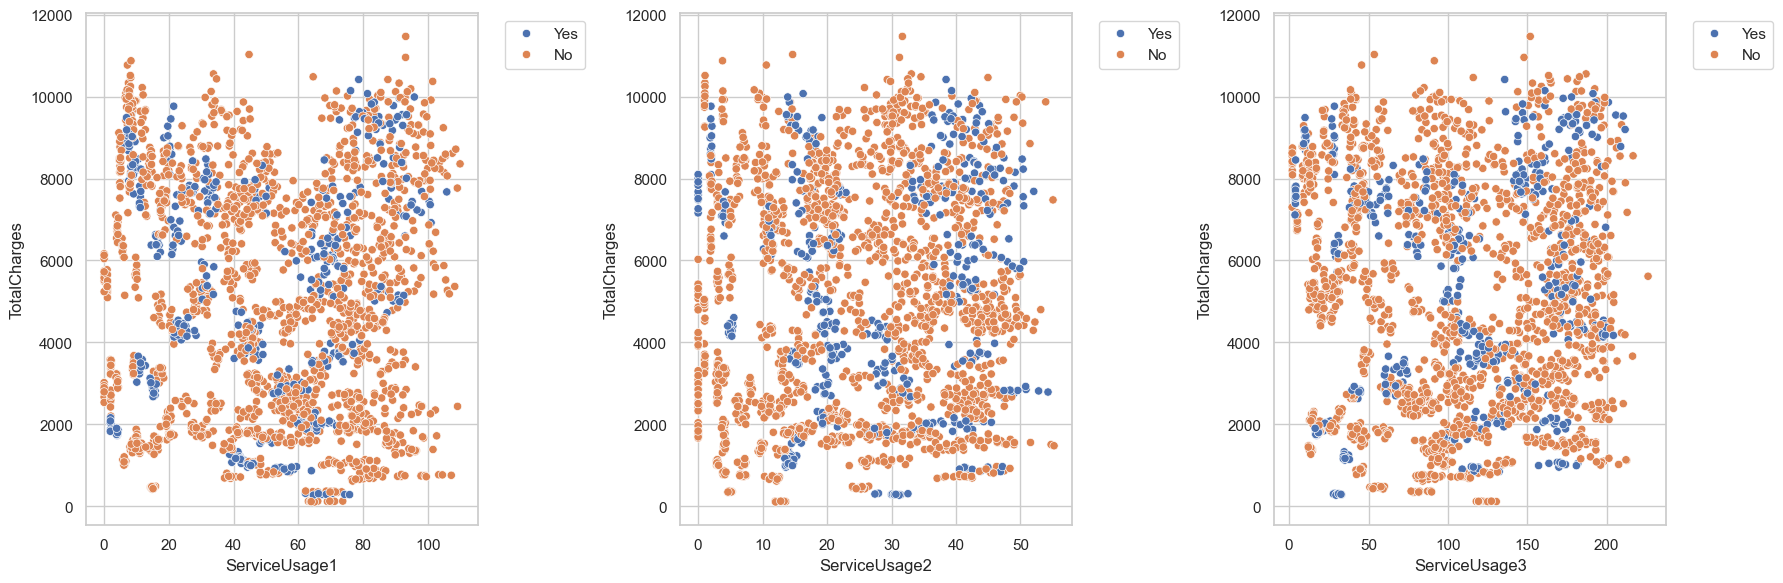

In [23]:
fig,axs=plt.subplots(1,3,figsize=(18,6))
for idx,ax in enumerate(axs):
    sns.scatterplot(data=data,y="TotalCharges",x=f"ServiceUsage{idx+1}",hue="Churn",ax=ax)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Categorical vs Numerical Analysis 

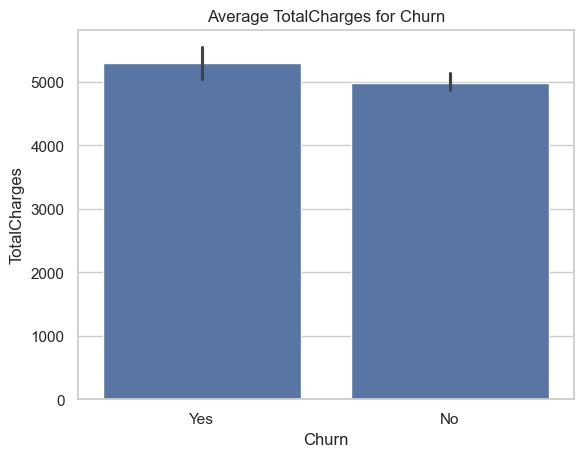

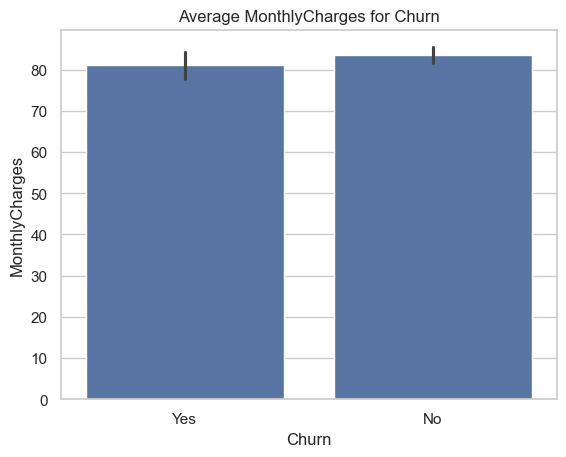

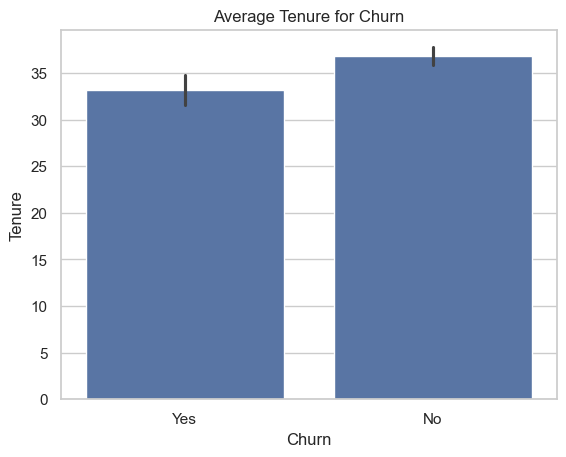

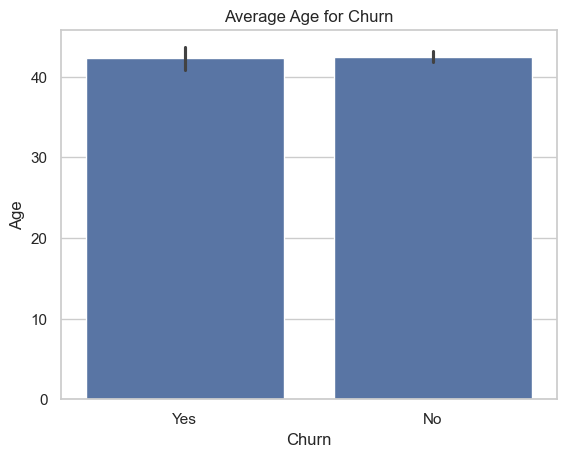

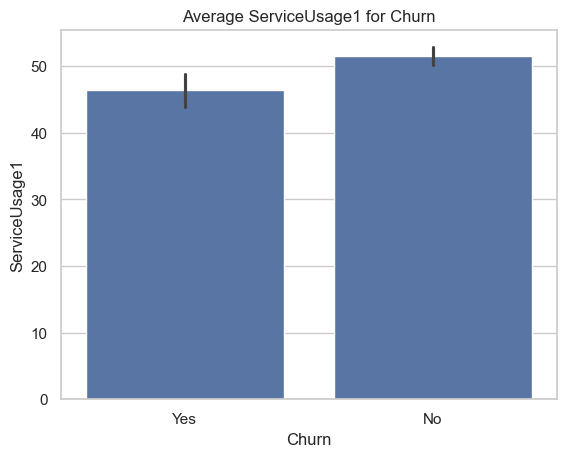

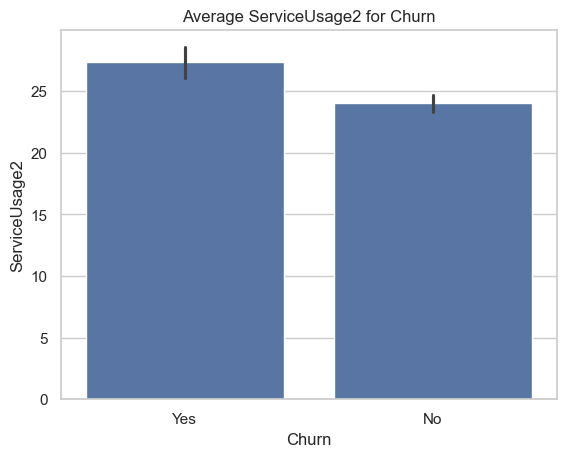

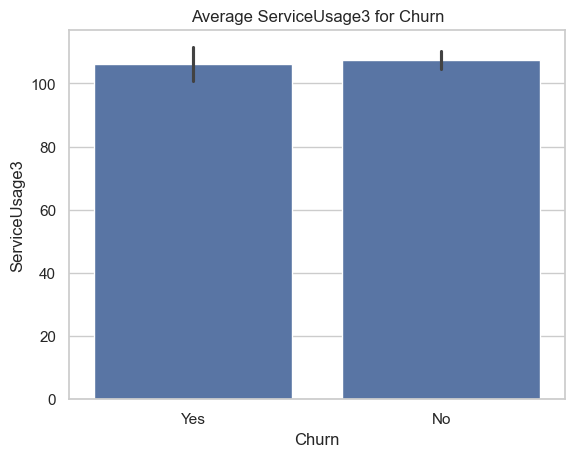

In [24]:
ys=["TotalCharges","MonthlyCharges","Tenure","Age","ServiceUsage1","ServiceUsage2","ServiceUsage3"]
for y in ys:
    sns.barplot(data=data,x="Churn",y=y)
    plt.title(f"Average {y} for Churn")
    plt.show()

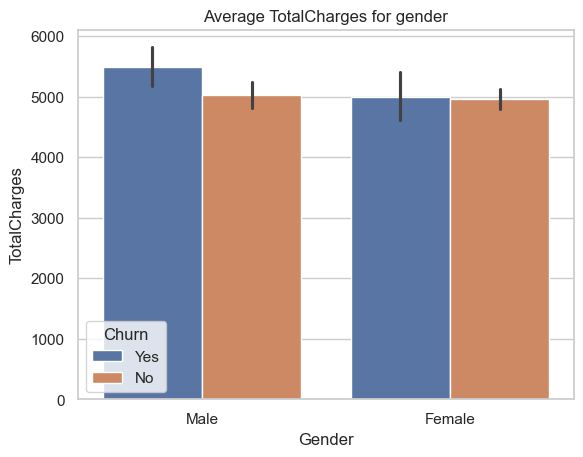

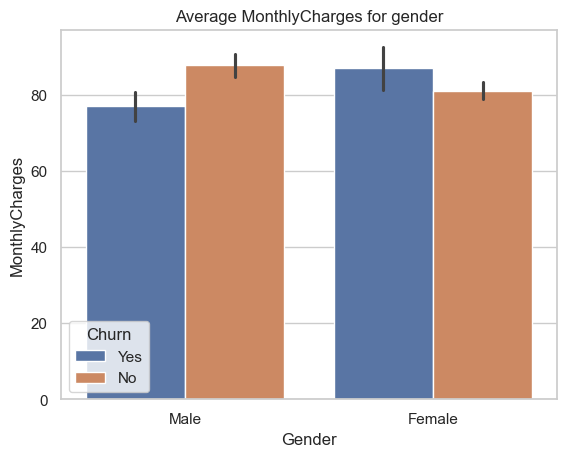

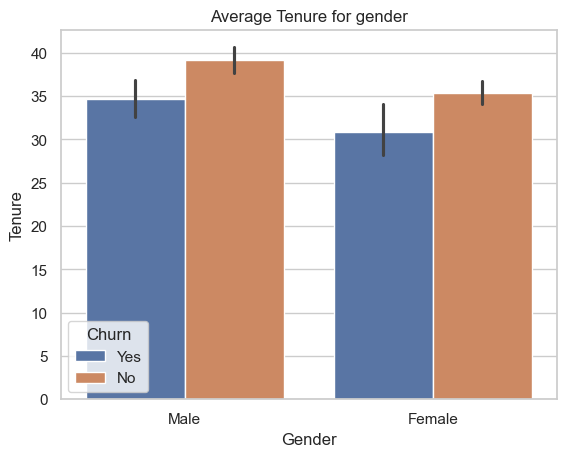

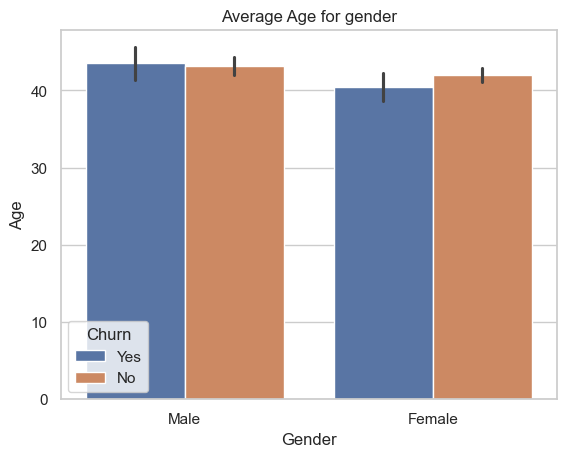

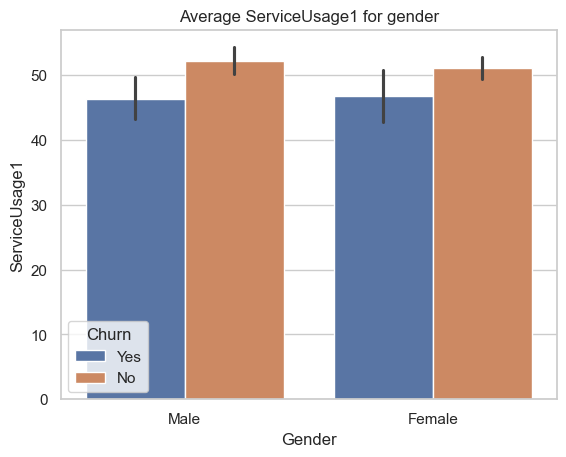

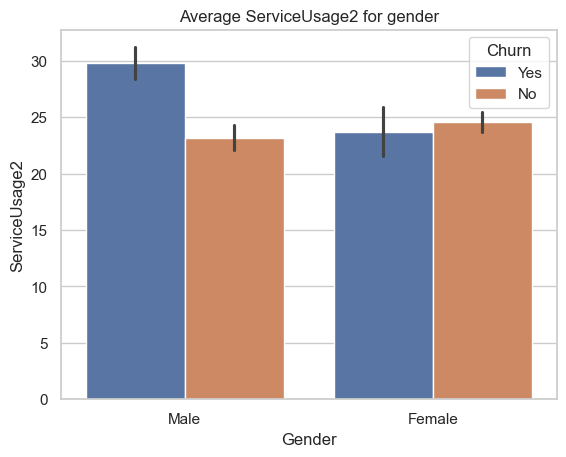

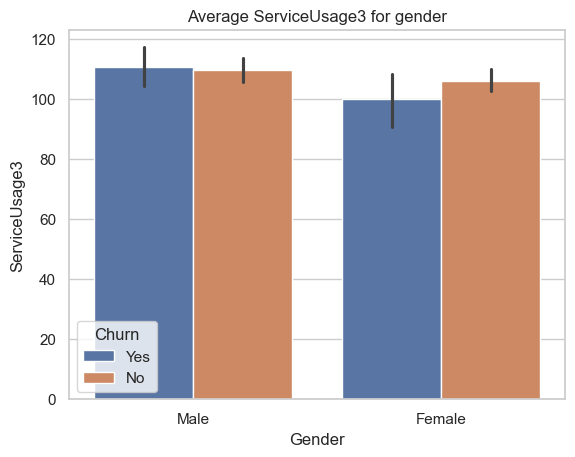

In [25]:
ys=["TotalCharges","MonthlyCharges","Tenure","Age","ServiceUsage1","ServiceUsage2","ServiceUsage3"]
for y in ys:
    sns.barplot(data=data,x="Gender",y=y,hue="Churn")
    plt.title(f"Average {y} for gender")
    plt.show()

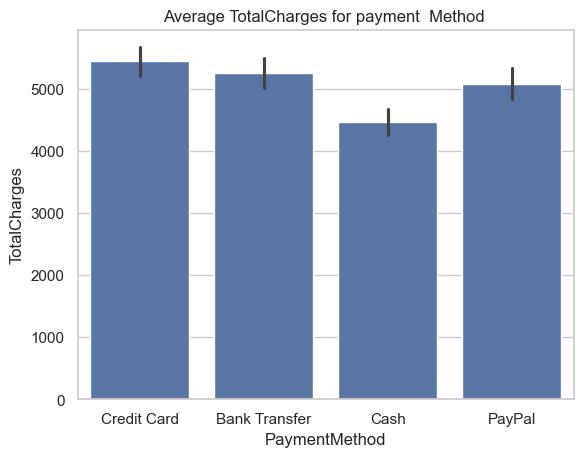

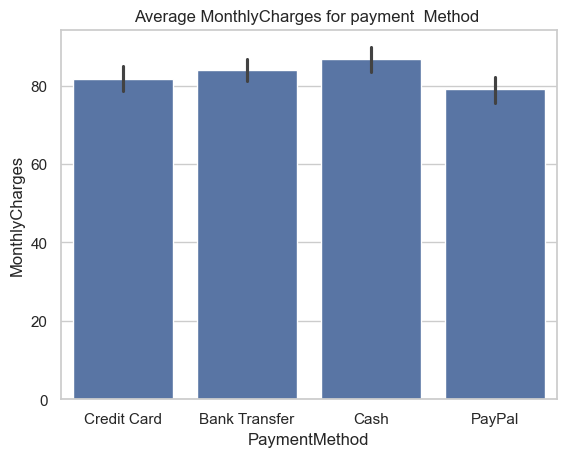

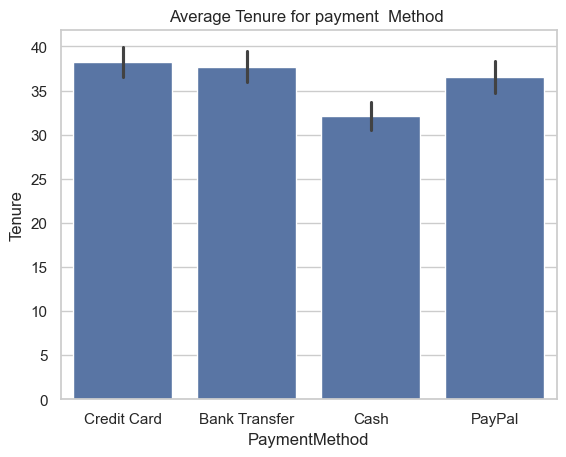

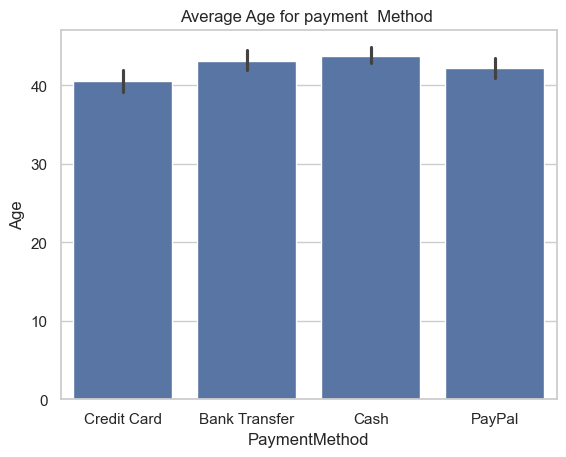

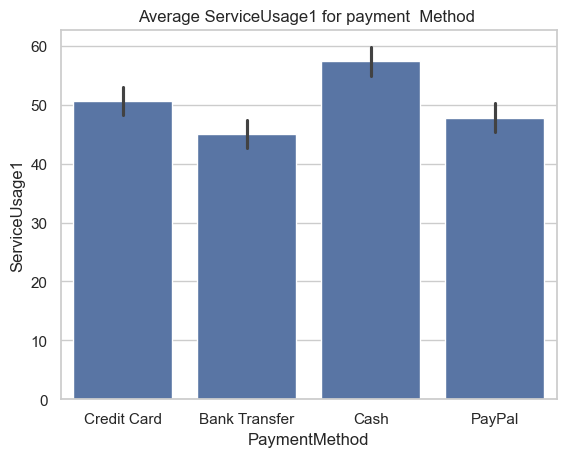

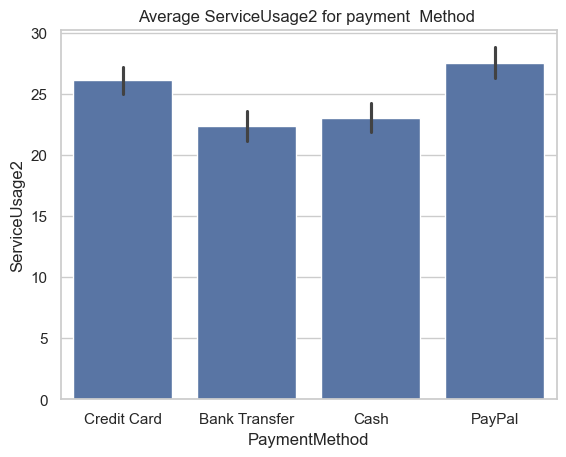

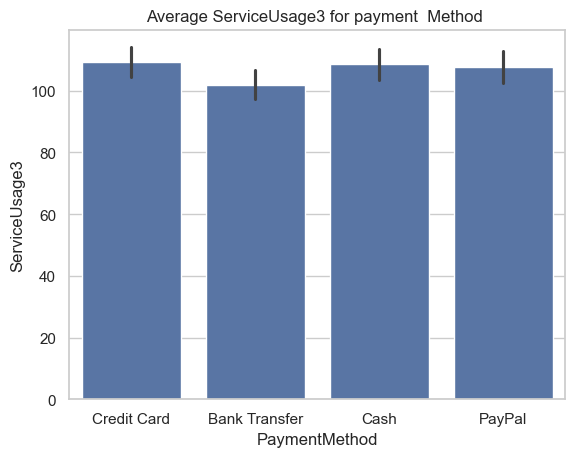

In [85]:
ys=["TotalCharges","MonthlyCharges","Tenure","Age","ServiceUsage1","ServiceUsage2","ServiceUsage3"]
for y in ys:
    sns.barplot(data=data,x="PaymentMethod",y=y,)
    plt.title(f"Average {y} for payment  Method ")
    plt.show()

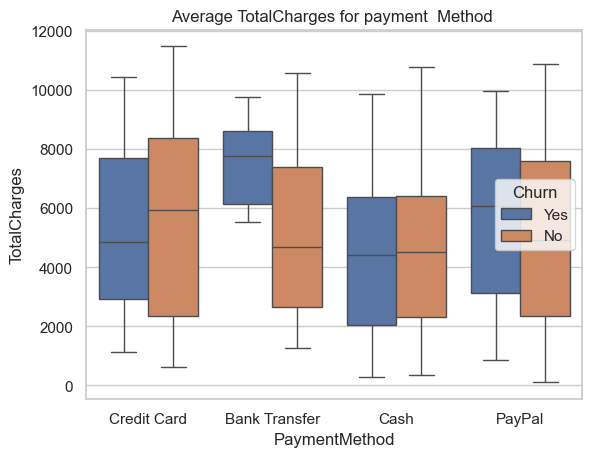

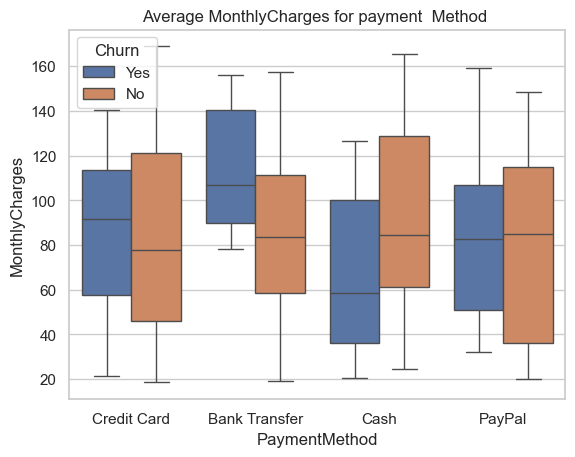

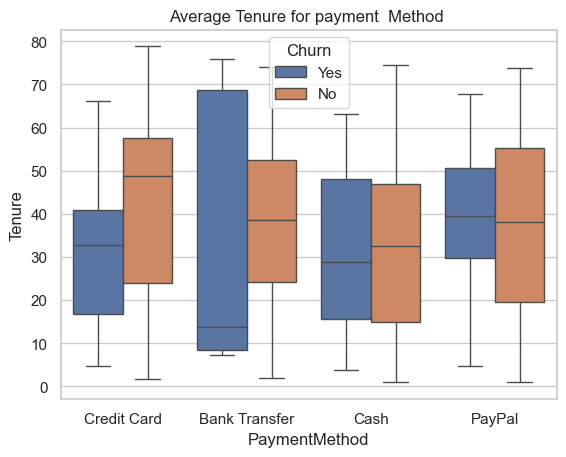

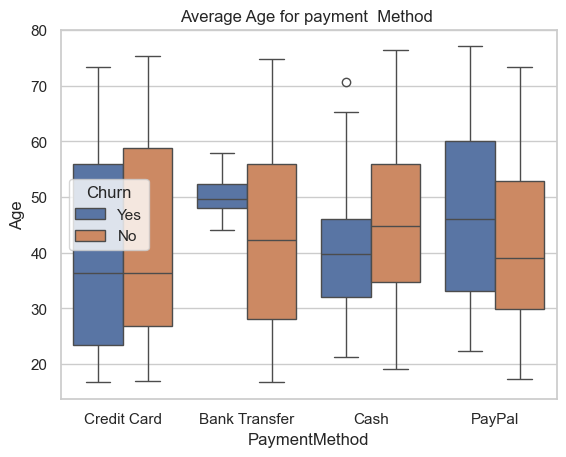

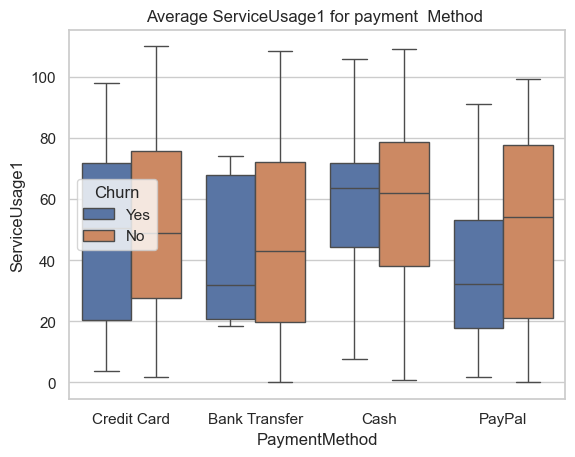

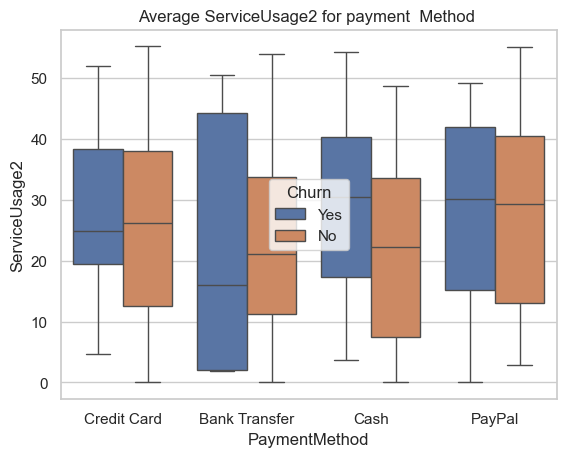

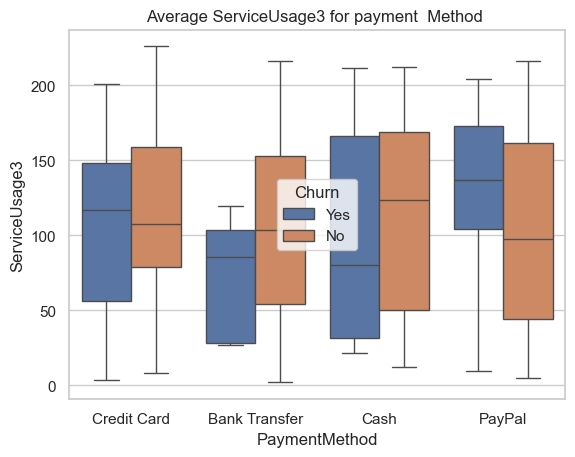

In [27]:
ys=["TotalCharges","MonthlyCharges","Tenure","Age","ServiceUsage1","ServiceUsage2","ServiceUsage3"]
for y in ys:
    sns.boxplot(data=data,x="PaymentMethod",y=y,hue="Churn")
    plt.title(f"Average {y} for payment  Method ")
    plt.show()

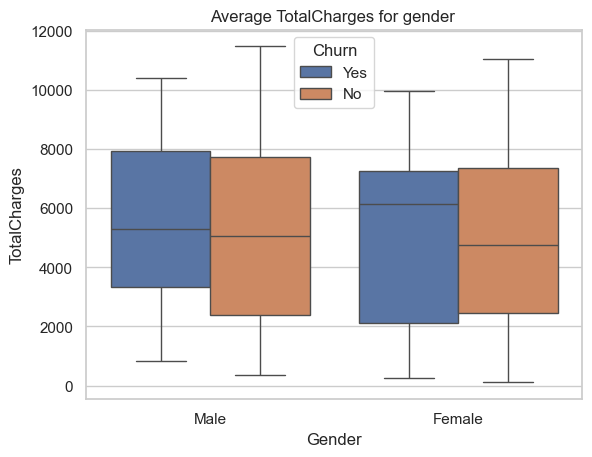

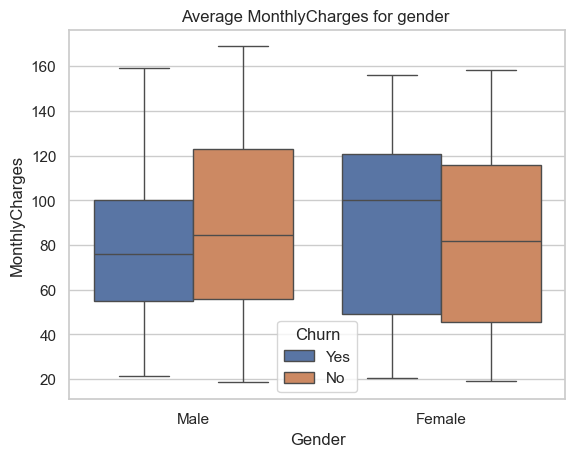

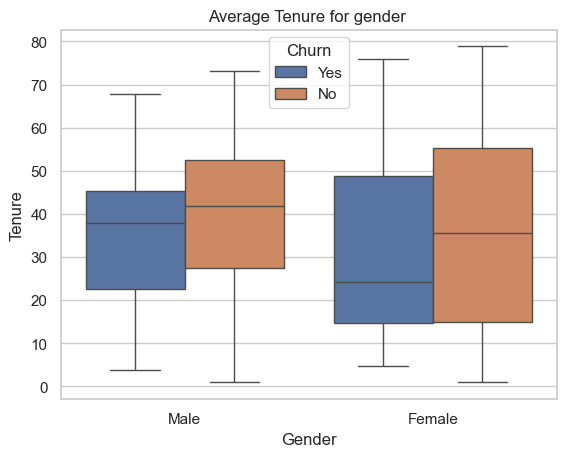

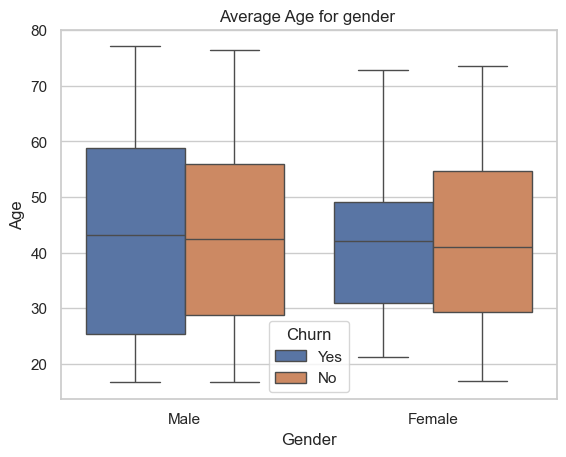

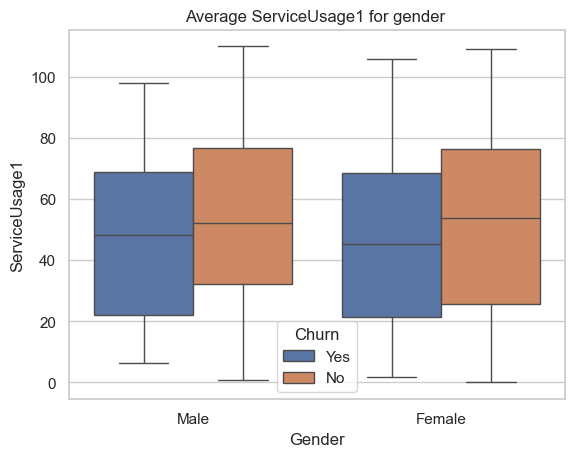

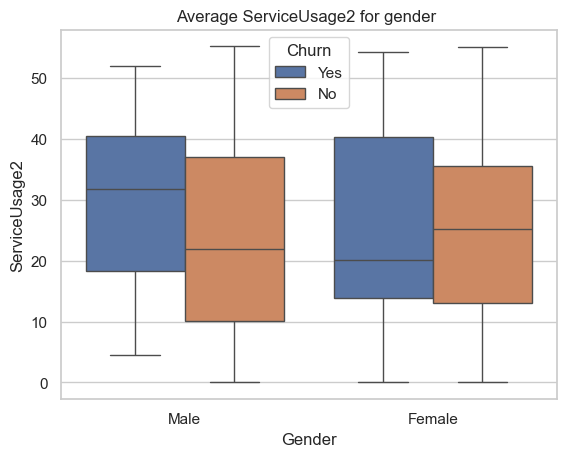

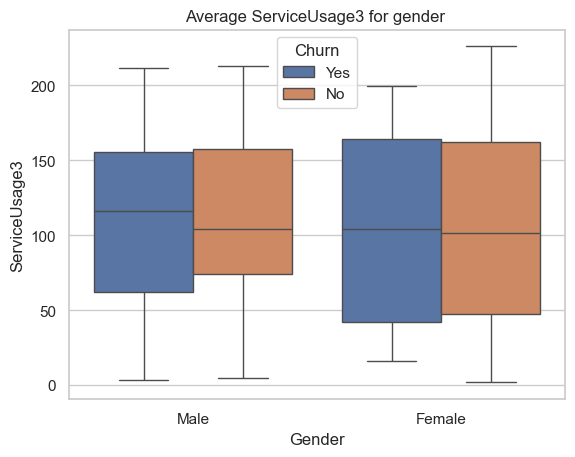

In [28]:
ys=["TotalCharges","MonthlyCharges","Tenure","Age","ServiceUsage1","ServiceUsage2","ServiceUsage3"]
for y in ys:
    sns.boxplot(data=data,x="Gender",y=y,hue="Churn")
    plt.title(f"Average {y} for gender ")
    plt.show()

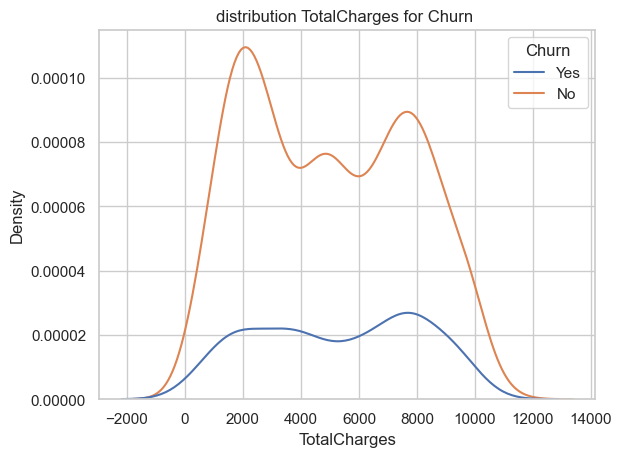

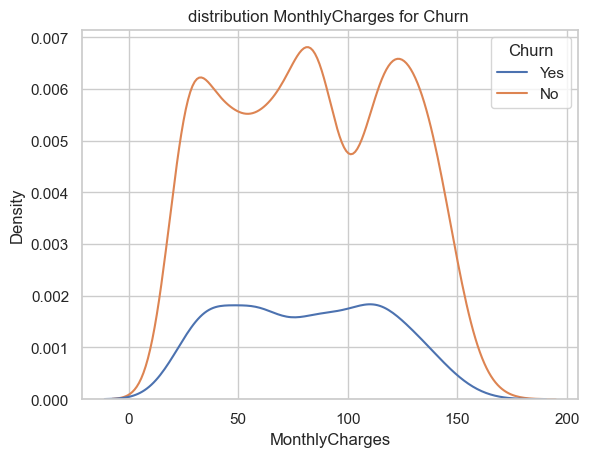

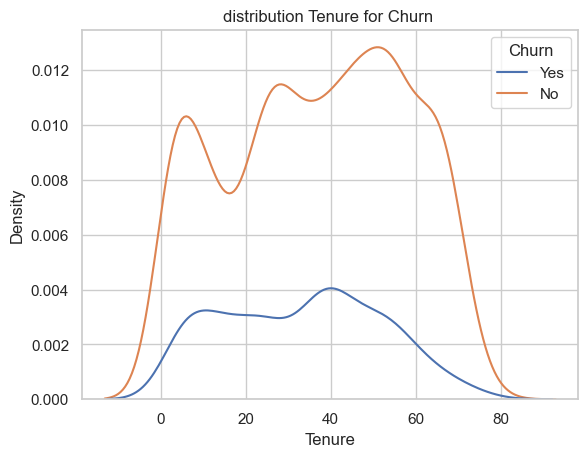

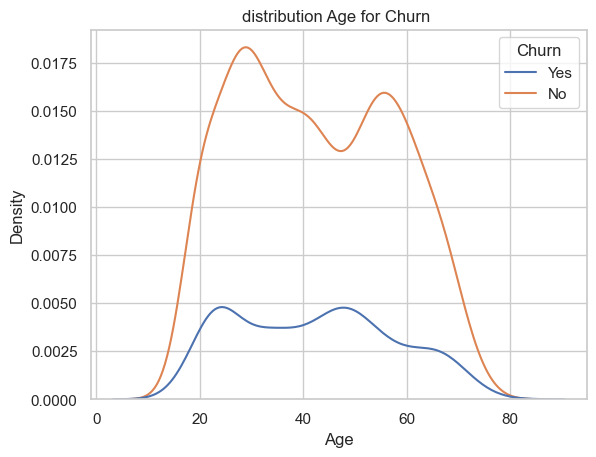

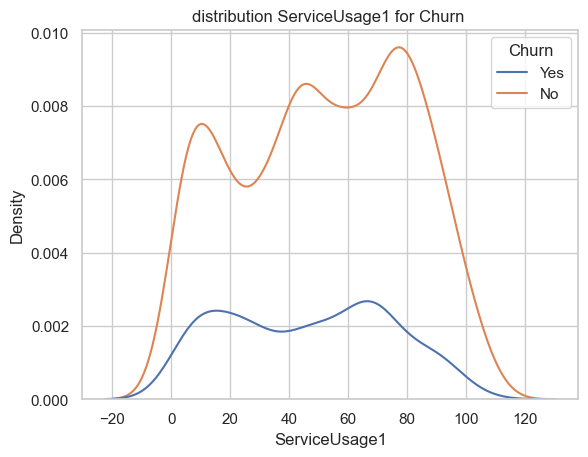

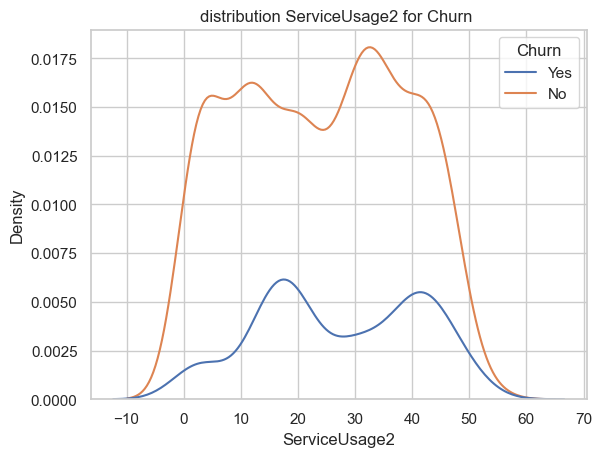

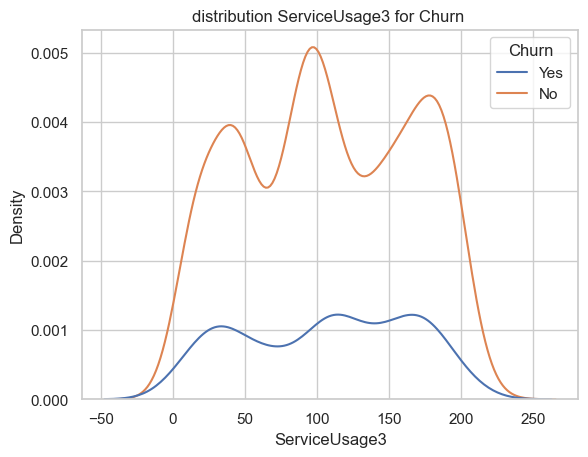

In [30]:
ys=["TotalCharges","MonthlyCharges","Tenure","Age","ServiceUsage1","ServiceUsage2","ServiceUsage3"]
for y in ys:
    sns.kdeplot(data=data,x=y,hue="Churn")
    plt.title(f"distribution {y} for Churn ")
    plt.show()

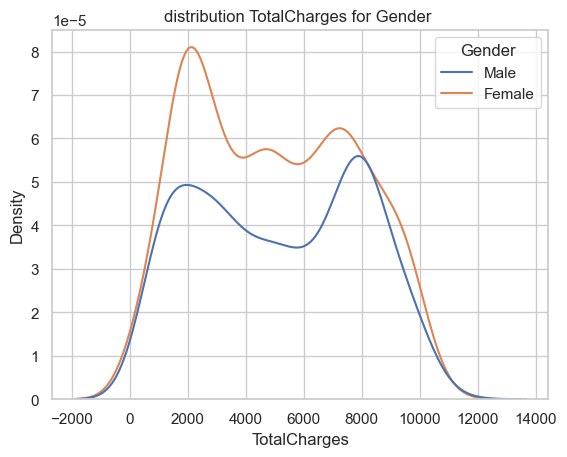

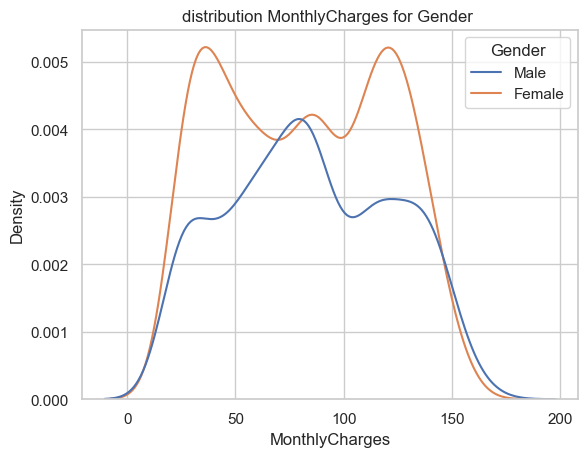

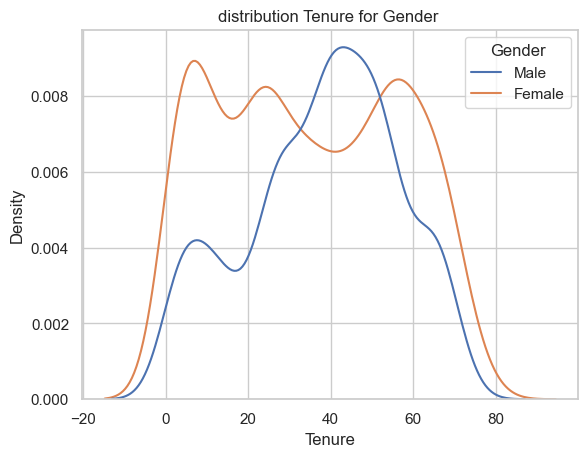

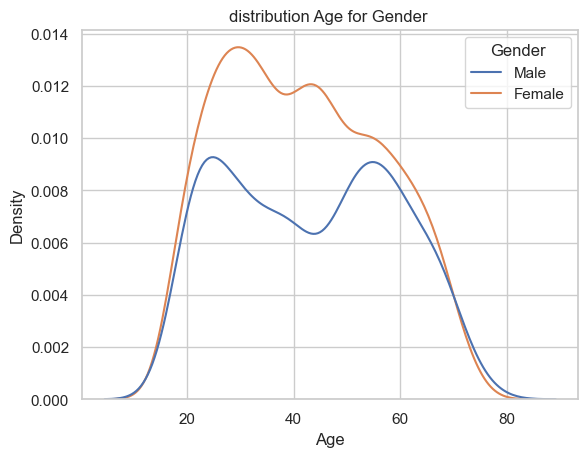

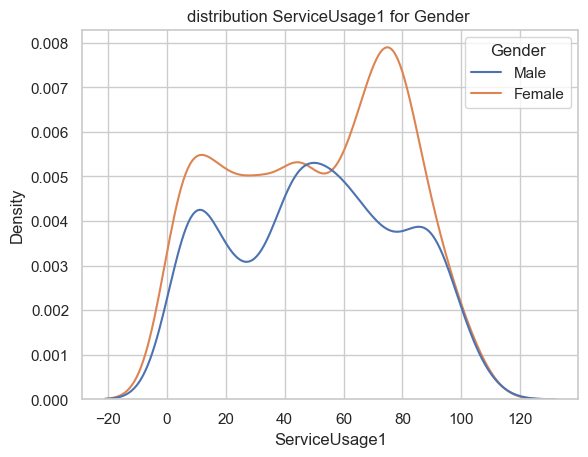

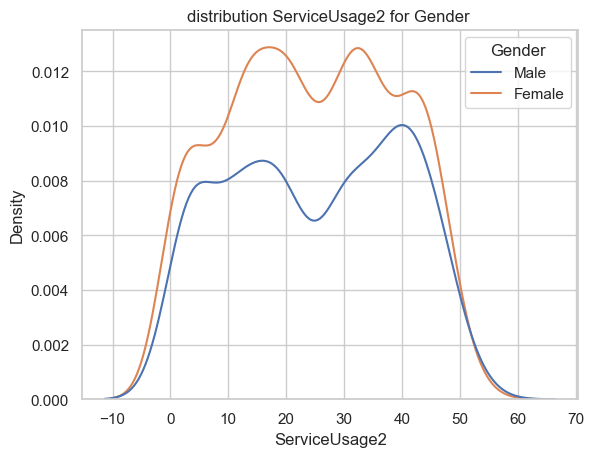

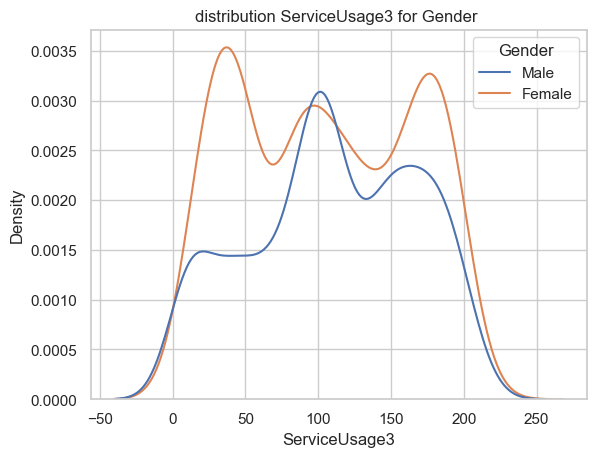

In [31]:
ys=["TotalCharges","MonthlyCharges","Tenure","Age","ServiceUsage1","ServiceUsage2","ServiceUsage3"]
for y in ys:
    sns.kdeplot(data=data,x=y,hue="Gender")
    plt.title(f"distribution {y} for Gender ")
    plt.show()

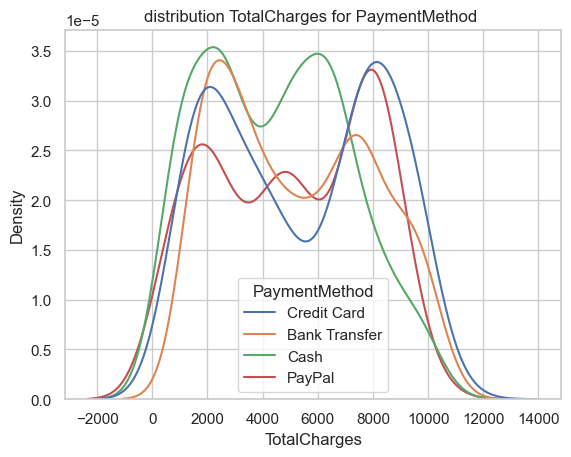

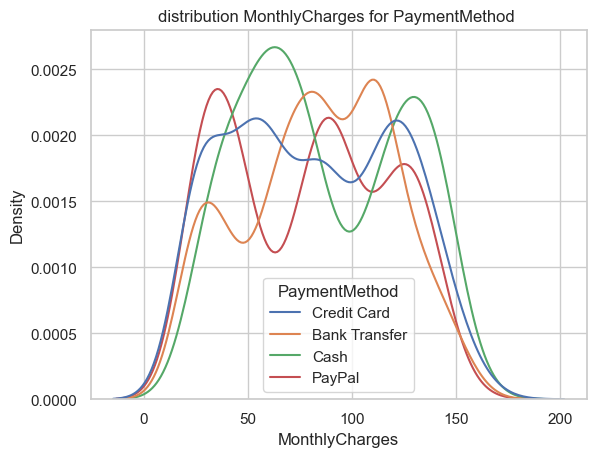

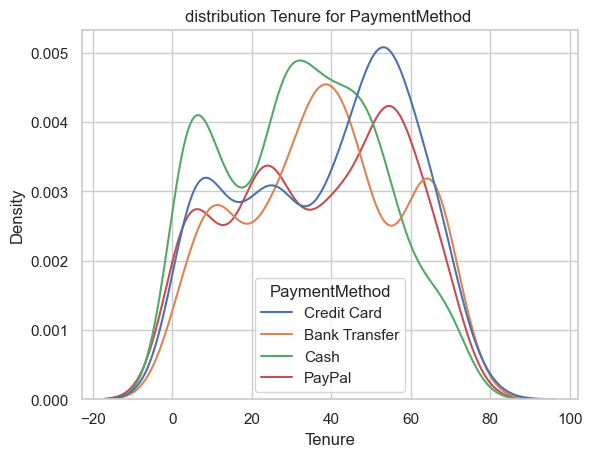

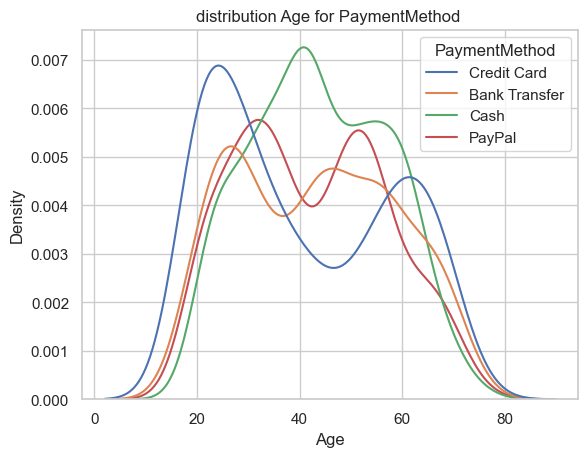

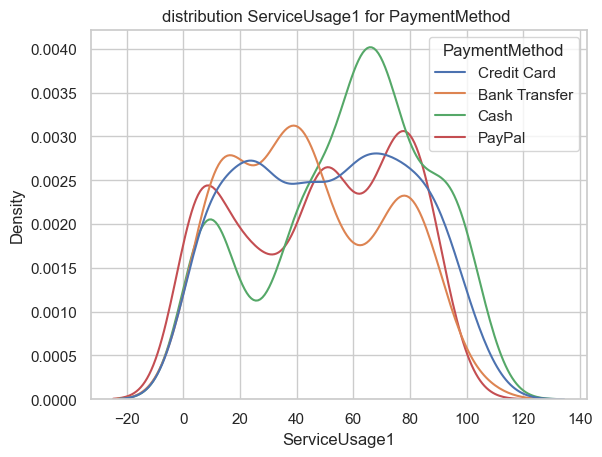

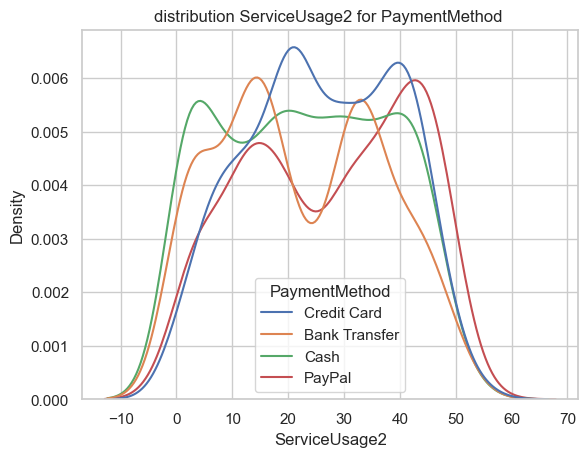

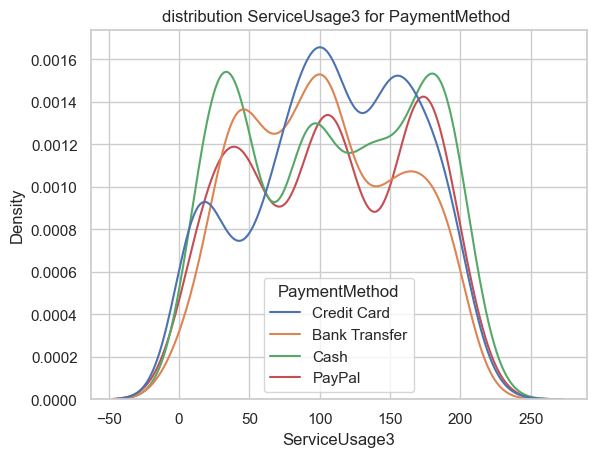

In [32]:
ys=["TotalCharges","MonthlyCharges","Tenure","Age","ServiceUsage1","ServiceUsage2","ServiceUsage3"]
for y in ys:
    sns.kdeplot(data=data,x=y,hue="PaymentMethod")
    plt.title(f"distribution {y} for PaymentMethod ")
    plt.show()

#### categorical vs categorical analysis

In [33]:
df1=pd.crosstab(data["Gender"],data["Churn"])
df1['row_sum'] = df1.sum(axis=1)

# Calculate the percentage of each value in the row
df_percentage1 = df1.div(df1['row_sum'], axis=0) * 100
df_percentage1.drop("row_sum",inplace=True,axis=1)
df_percentage1

Churn          No        Yes
Gender                      
Female  85.217391  14.782609
Male    70.588235  29.411765

<Axes: xlabel='Churn', ylabel='Gender'>

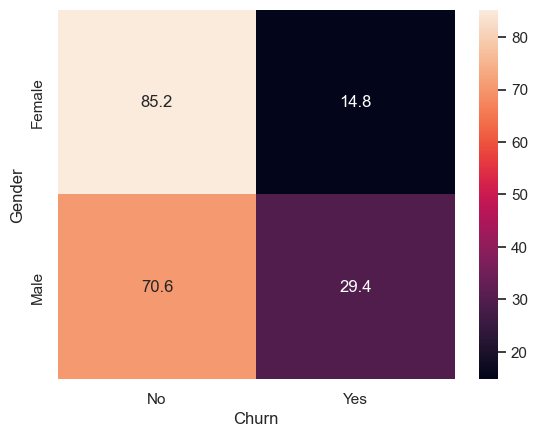

In [34]:
sns.heatmap(df_percentage1,annot=True, fmt='.1f')

<Axes: xlabel='PaymentMethod', ylabel='Churn'>

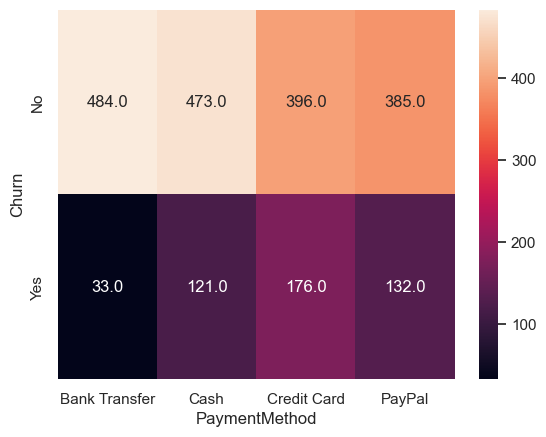

In [35]:
sns.heatmap(pd.crosstab(data["Churn"],data["PaymentMethod"]),annot=True, fmt='.1f')

In [36]:
df2=pd.crosstab(data["Gender"],data["PaymentMethod"])
df['row_sum'] = df2.sum(axis=1)

# Calculate the percentage of each value in the row
df_percentage2 = df.div(df2['row_sum'], axis=0) * 100
df_percentage2.drop("row_sum",inplace=True,axis=1)
df_percentage2

PaymentMethod  Bank Transfer       Cash  Credit Card     PayPal
Gender                                                         
Female             26.086957  26.956522    21.739130  25.217391
Male               20.000000  27.058824    31.764706  21.176471

<Axes: xlabel='PaymentMethod', ylabel='Gender'>

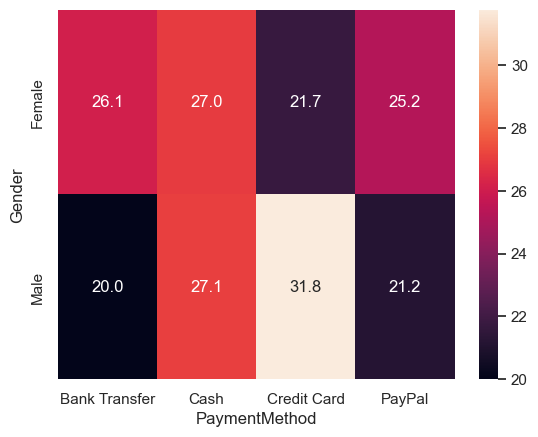

In [87]:
sns.heatmap(df_percentage,annot=True, fmt='.1f')

In [57]:
correlation = data.drop(["CustomerID","Gender","Churn","PaymentMethod"],axis=1).corr()
correlation

Age    Tenure  MonthlyCharges  TotalCharges  \
Age             1.000000 -0.026854        0.093559     -0.086904   
Tenure         -0.026854  1.000000        0.081333      0.022361   
MonthlyCharges  0.093559  0.081333        1.000000      0.045508   
TotalCharges   -0.086904  0.022361        0.045508      1.000000   
ServiceUsage1   0.047509 -0.007517       -0.036153     -0.011872   
ServiceUsage2   0.003534  0.009887       -0.013658      0.064172   
ServiceUsage3   0.037133  0.090609        0.152115      0.003994   

                ServiceUsage1  ServiceUsage2  ServiceUsage3  
Age                  0.047509       0.003534       0.037133  
Tenure              -0.007517       0.009887       0.090609  
MonthlyCharges      -0.036153      -0.013658       0.152115  
TotalCharges        -0.011872       0.064172       0.003994  
ServiceUsage1        1.000000      -0.021734       0.046775  
ServiceUsage2       -0.021734       1.000000       0.093394  
ServiceUsage3        0.046775       0.093394       1.000000

### PCA

In [68]:
from sklearn.decomposition import PCA

In [72]:
X=data.drop(["Churn","PaymentMethod","CustomerID","Gender"],axis=1)

In [73]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [78]:
X

array([[-2100.37628099,   -47.82995741],
       [ 2409.8125137 ,    33.35662128],
       [-1986.04781352,    54.79586708],
       ...,
       [-2610.49935828,    91.51763382],
       [ 2494.4868715 ,    90.33068065],
       [-2662.33590317,   101.35105886]], shape=(2200, 2))

In [74]:
y=data["Churn"]

In [80]:
pca_df=pd.DataFrame(data=X,columns=["pca1","pca2"])
pca_df["Churn"]=y

<Axes: xlabel='pca1', ylabel='pca2'>

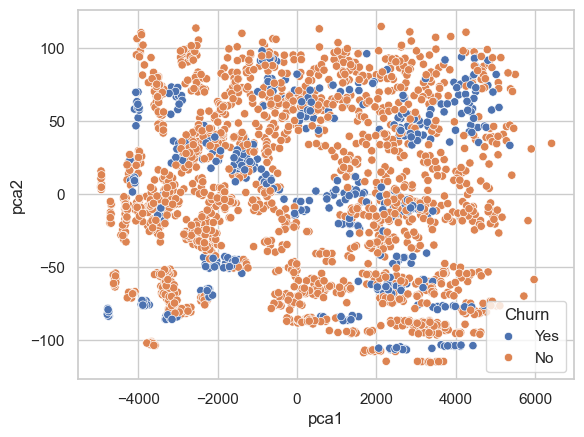

In [82]:
sns.scatterplot(data=pca_df,x="pca1",y="pca2",hue="Churn")